### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Univariate Analysis
  - Bivariate Analysis
  - Multivariate Analysis
  
4. Data Preparation
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Feature Selection
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
6. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model
  
7. Main problem statement for the Assignment
  - 1. confusion matrix and ROC graph for each of the models
  - 2. Identify customers that are most likely to own a house
  

8. Summary
  

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [3]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve,precision_score,recall_score,f1_score
from   sklearn.linear_model import LogisticRegression,SGDClassifier
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.neighbors import KNeighborsClassifier
from   sklearn.svm import SVC
from   sklearn.naive_bayes import GaussianNB
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   catboost import CatBoostClassifier
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [28]:
cloumns_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
               "occupation", "relationship", "race", "sex", "capital_gain", 
               "capital_loss", "hours_per_week", "native_country", "income"]

In [29]:
# Read data in form of a csv file
df = pd.read_csv('adult.data.csv', names = cloumns_names)

# First 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [30]:
# Dimension of the data
df.shape

(32561, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
# Summary of the dataset
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
for i in df.columns:
    print(i, ":" ,len(df[i].value_counts()))   

age : 73
workclass : 9
fnlwgt : 21648
education : 16
education_num : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
capital_gain : 119
capital_loss : 92
hours_per_week : 94
native_country : 42
income : 2


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [34]:
# Missing values percentage for every column
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [35]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
    * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [36]:
# Check for 'na' in dataset
round((df.isin(['na']).sum() / df.shape[0])
    * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

 we dont have any missing and null values in our data set

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [37]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['sex', 'income']
Categorical Columns :  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Numerical Columns :  ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

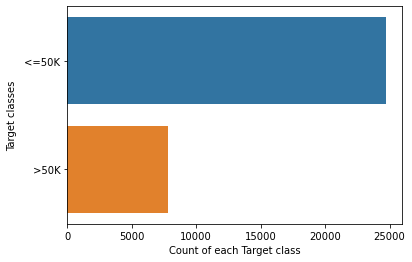

In [38]:
# Check distribution of target class
sns.countplot(y=df['income'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [40]:
#Checking the counts of label categories
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: income, dtype: object

The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# 3.3 Univariate Analysis

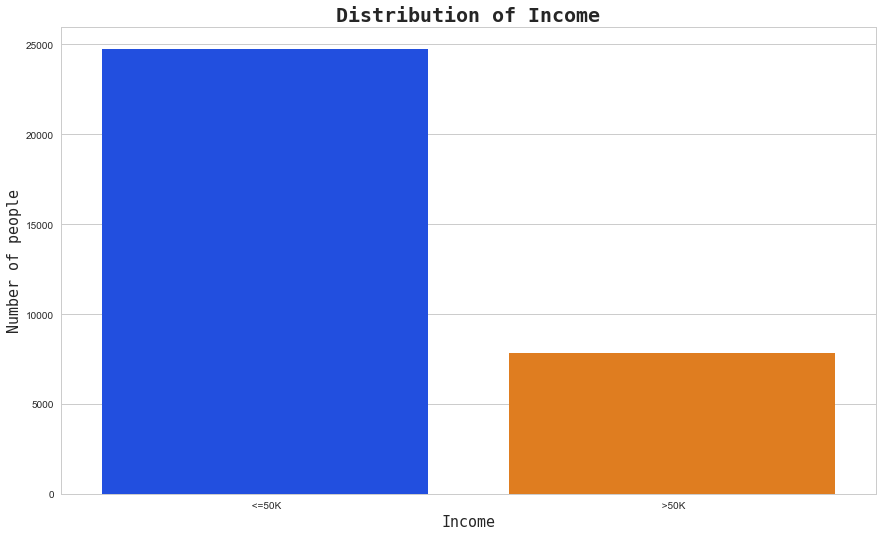

In [54]:
# Creating a barplot for 'Income'
income = df['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(13, 8))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

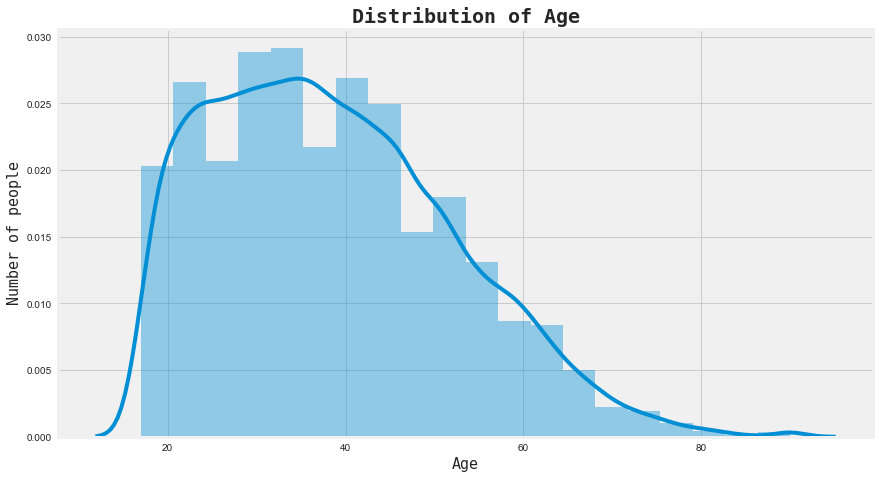

In [55]:
# Creating a distribution plot for 'Age'
age = df['age'].value_counts()

plt.figure(figsize=(13, 7))
plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

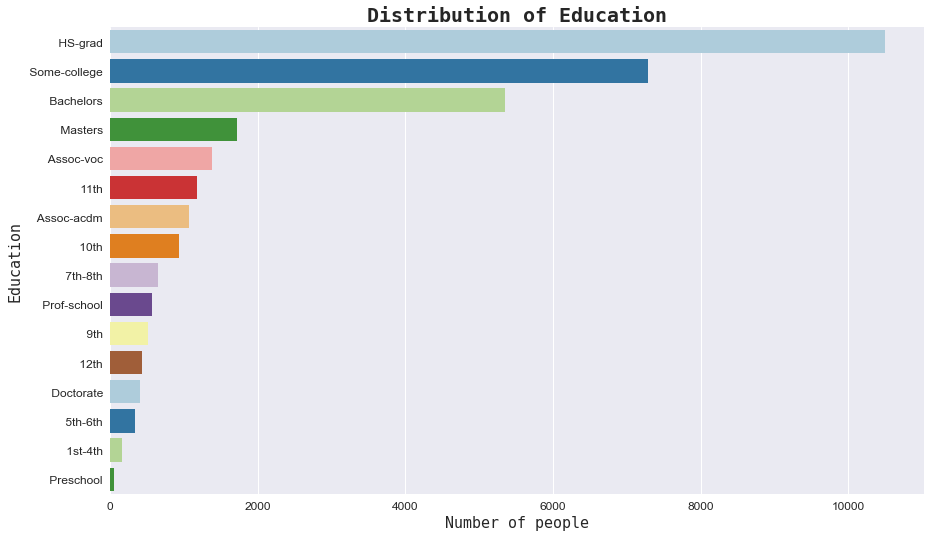

In [52]:
# Creating a barplot for 'Education'
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(13, 8))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

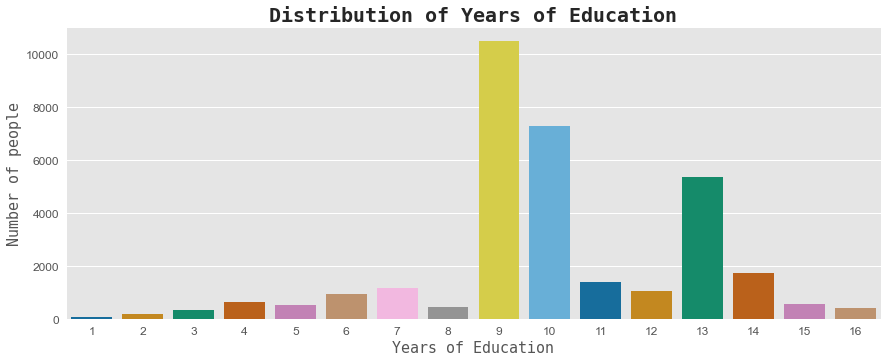

In [60]:
# Creating a barplot for 'Years of Education'
edu_num = df['education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(13, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

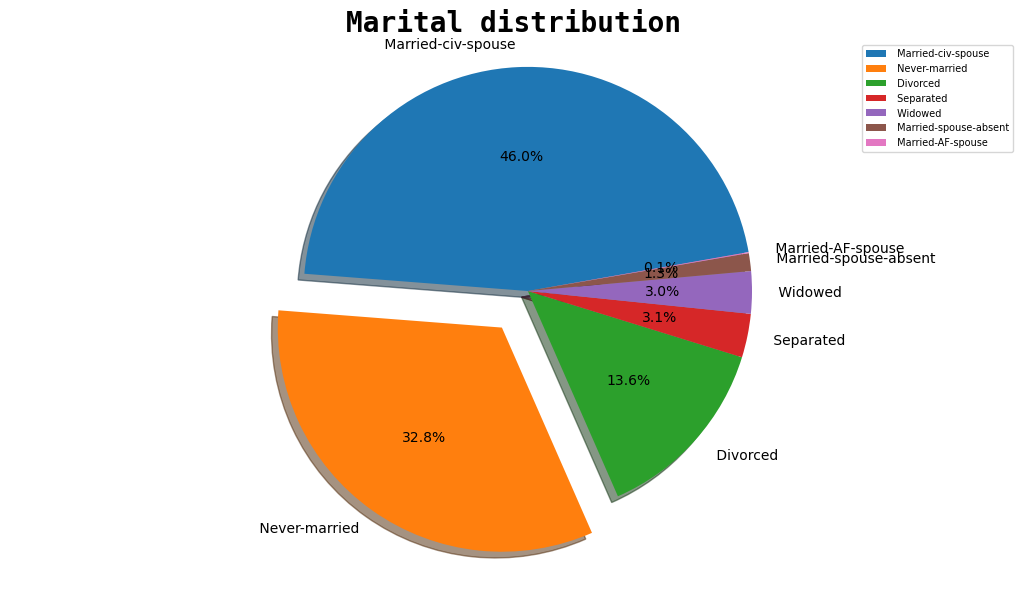

In [64]:
# Creating a pie chart for 'Marital status'
marital = df['marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(13, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

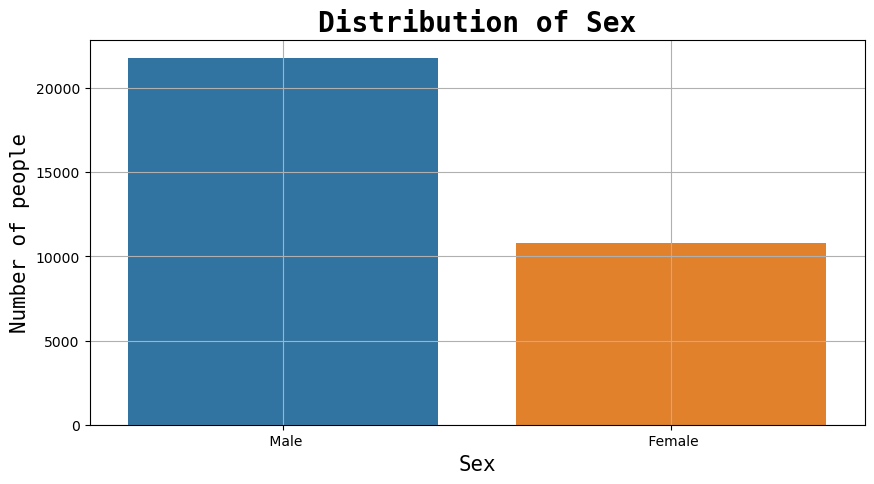

In [66]:
# Creating a barplot for 'Sex'
sex = df['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

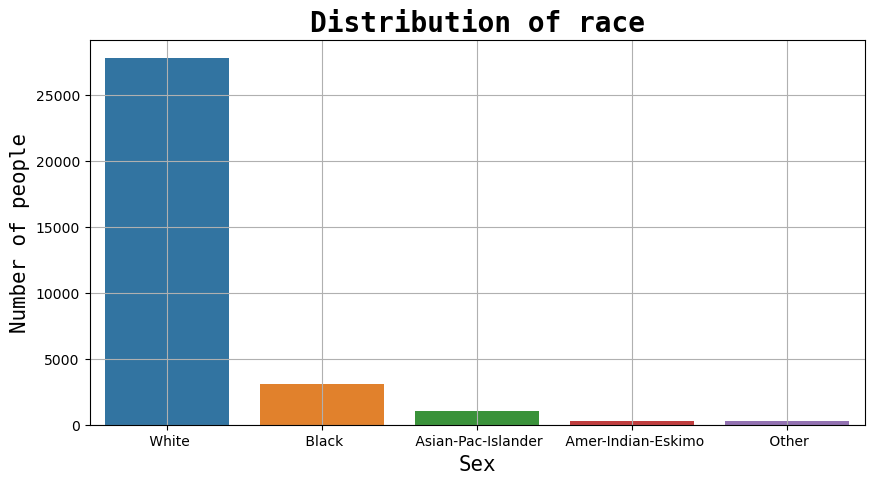

In [68]:
# Creating a barplot for 'Sex'
sex = df['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

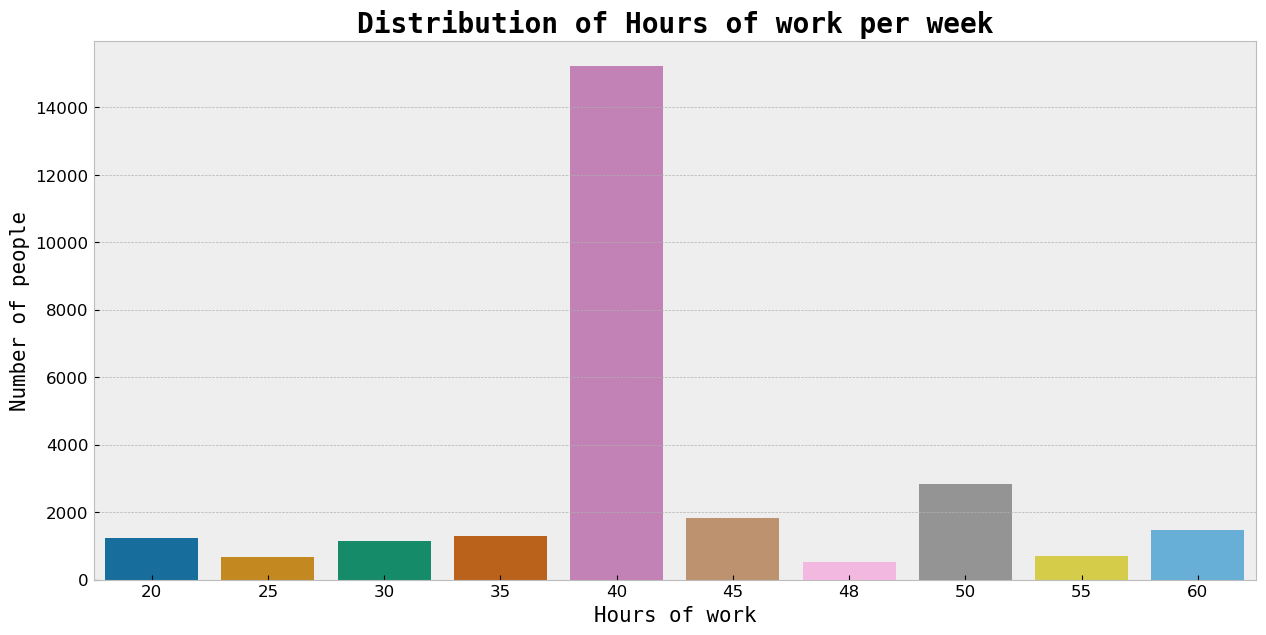

In [70]:
# Creating a barplot for 'Hours per week'
hours = df['hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# 3.4 Bivariate Analysis

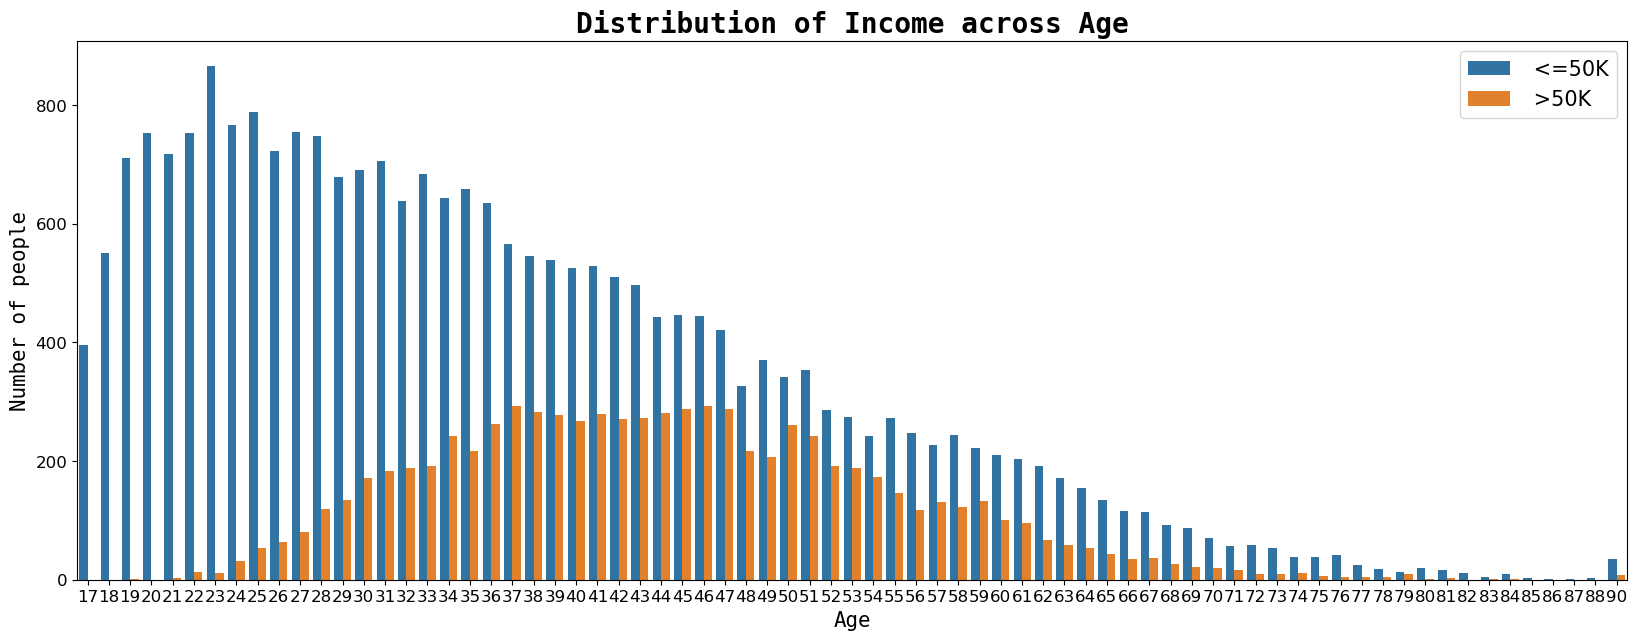

In [74]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

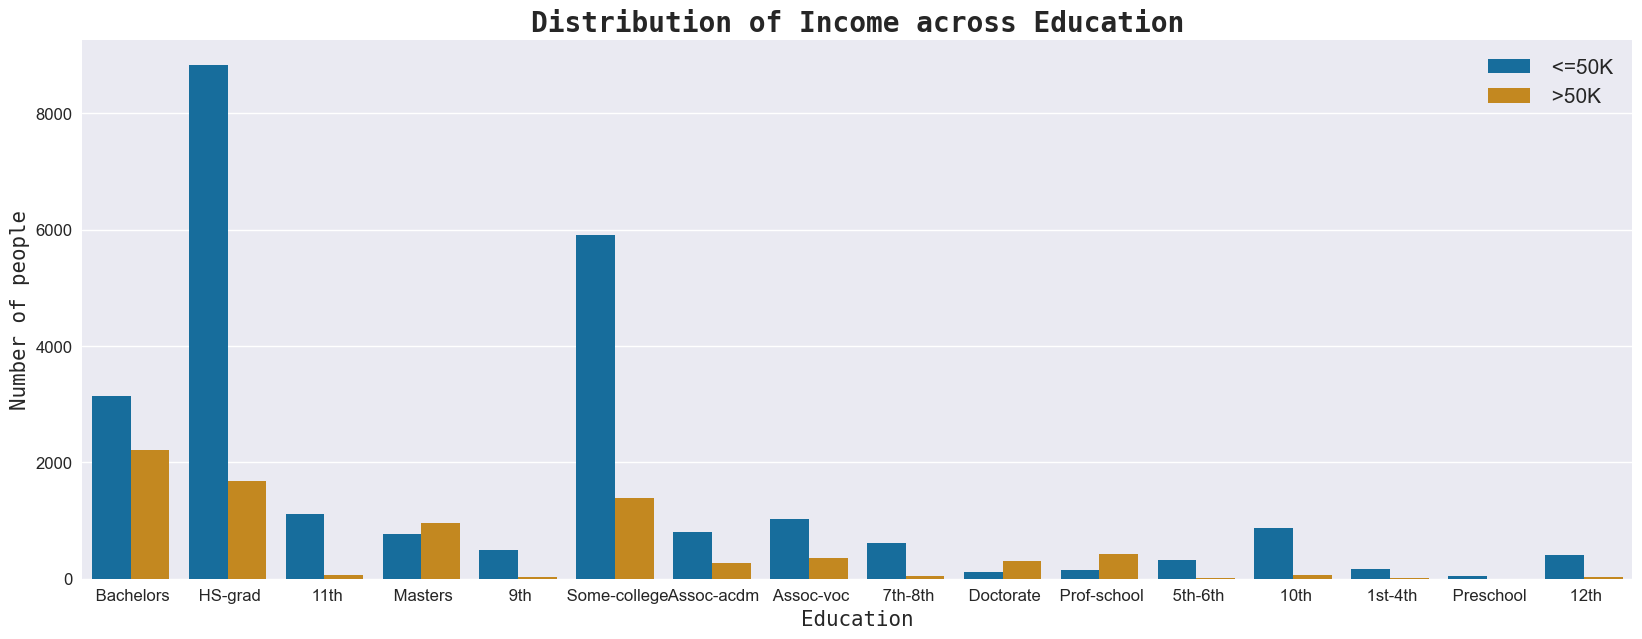

In [75]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

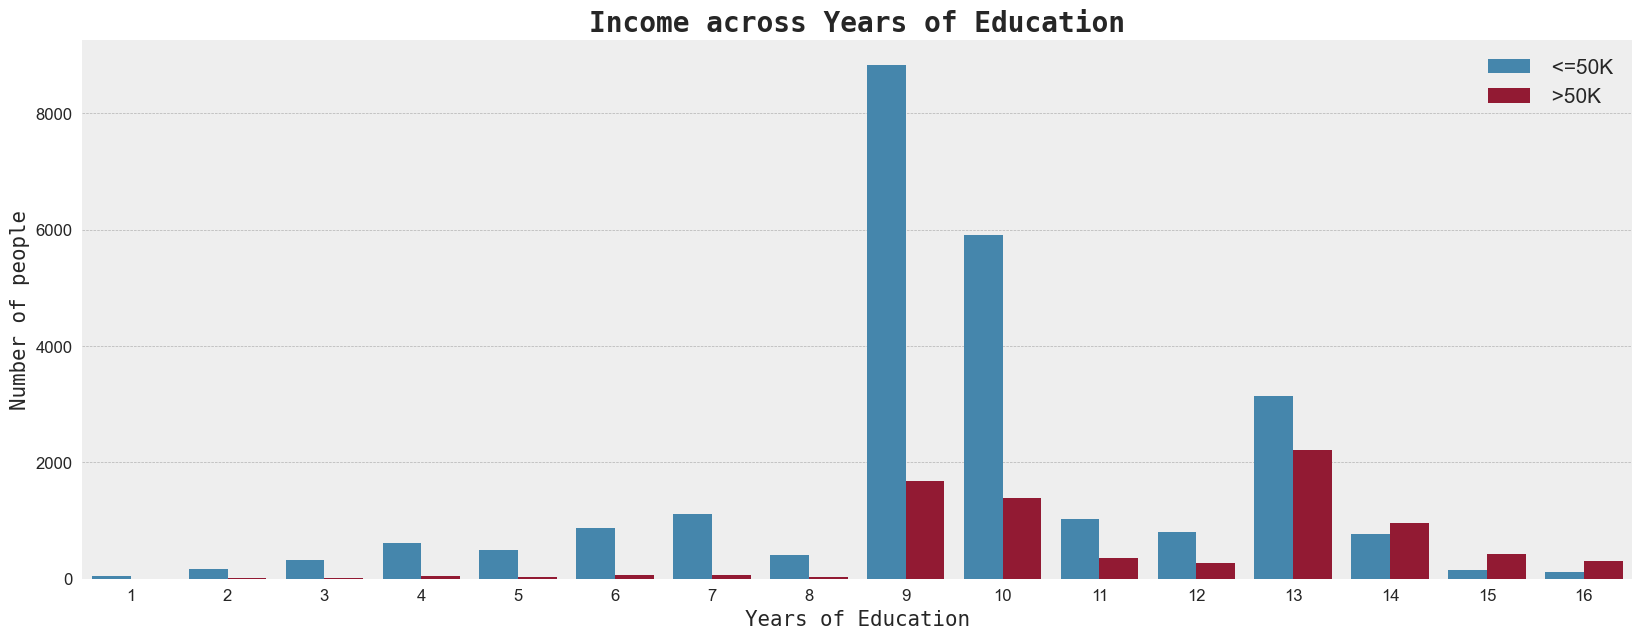

In [77]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df['education_num'],
              hue=df['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

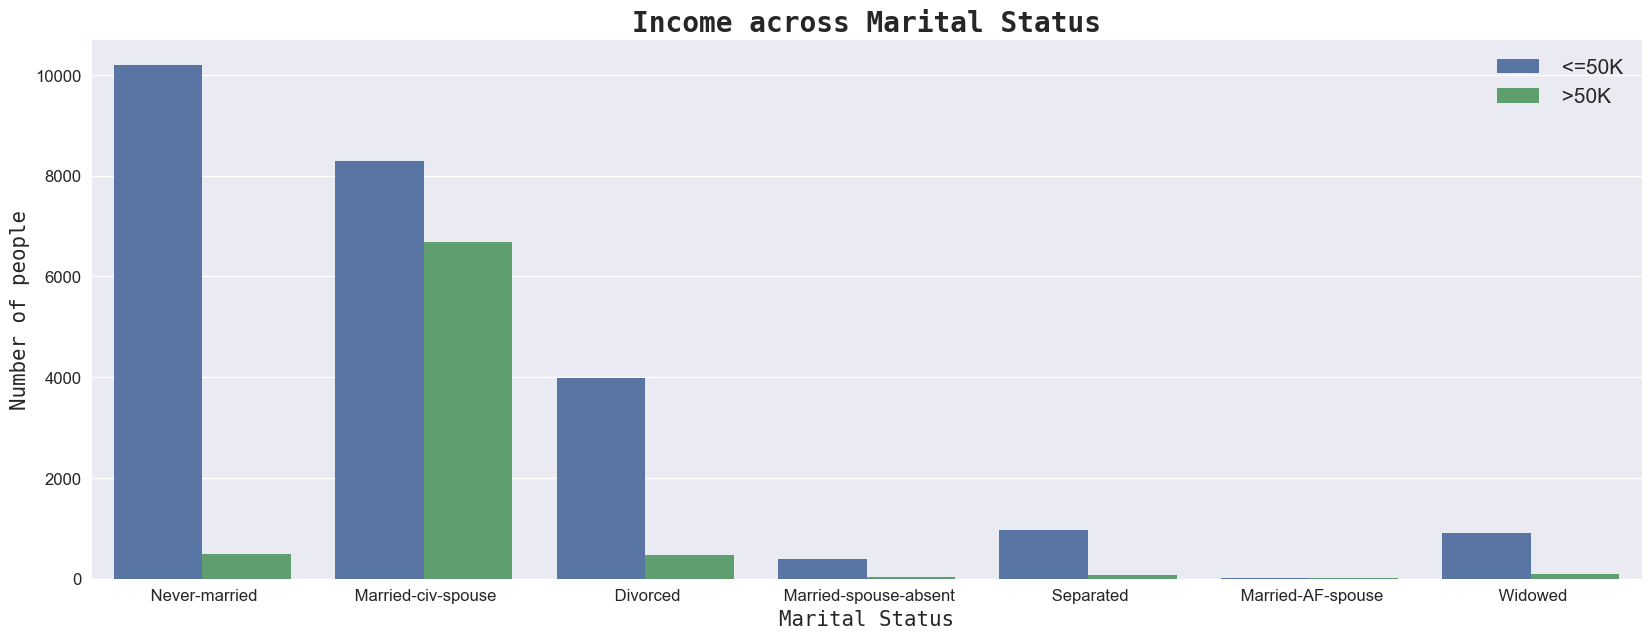

In [78]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital_status'], hue=df['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

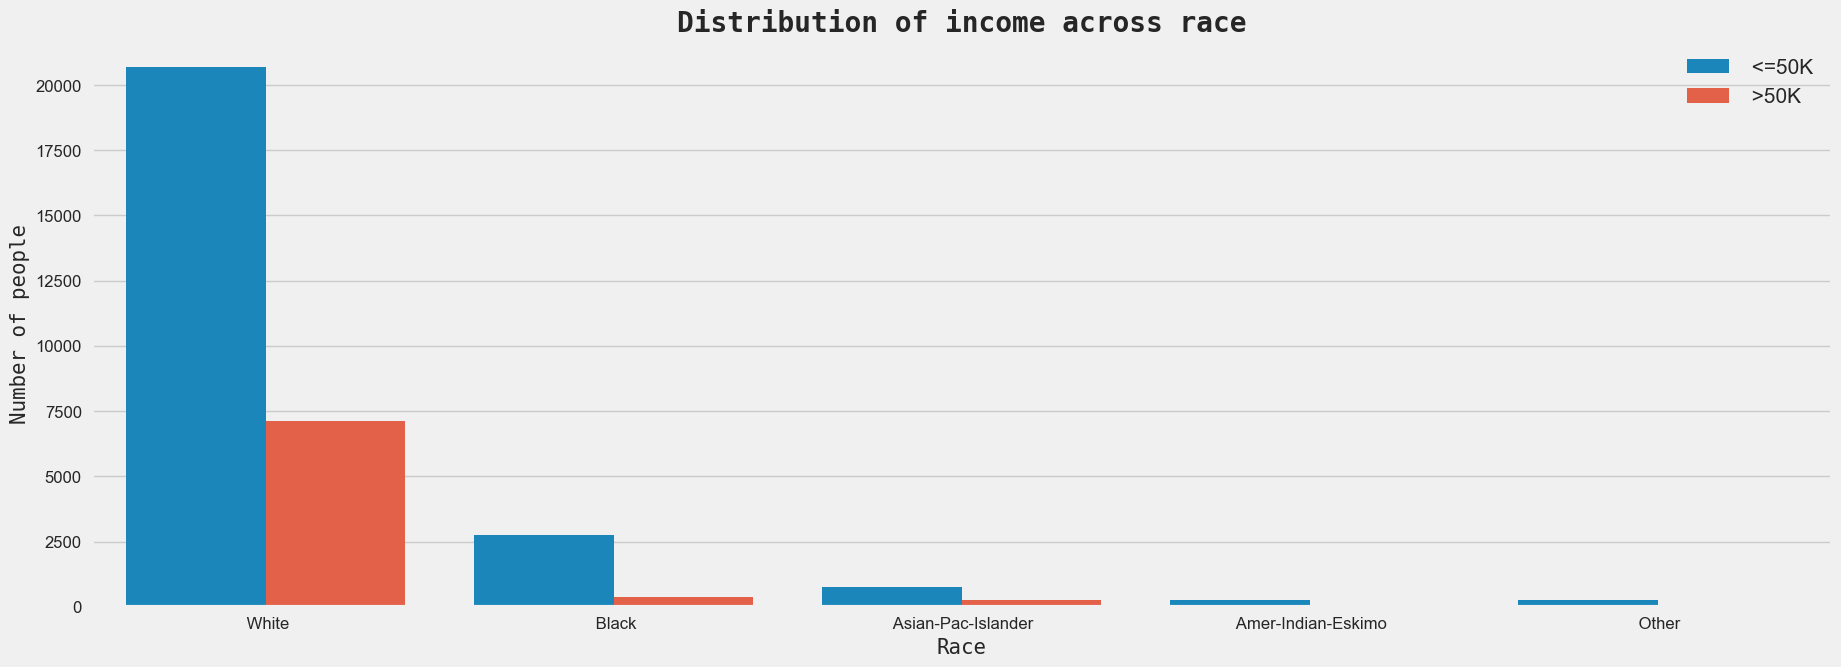

In [82]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df['race'], hue=df['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

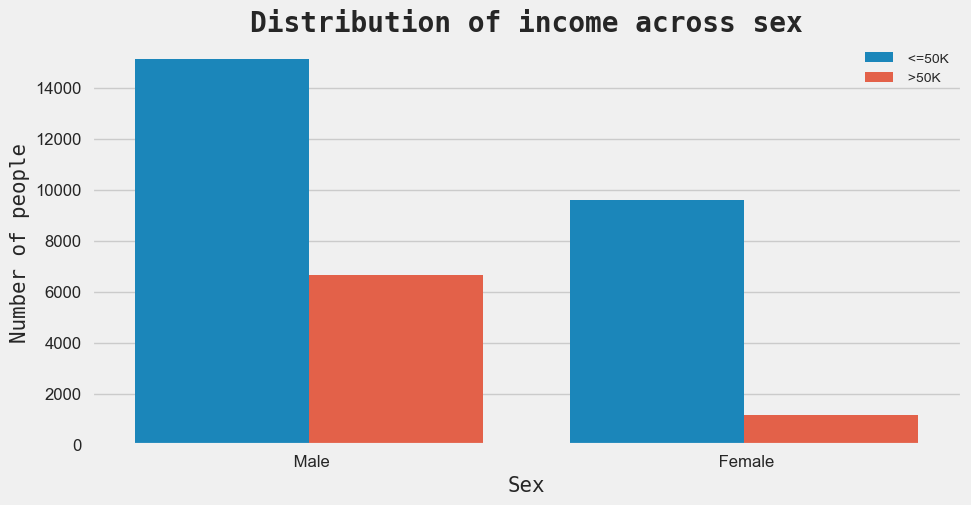

In [85]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.countplot(df['sex'], hue=df['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

# 3.5 Multivariate Analysis

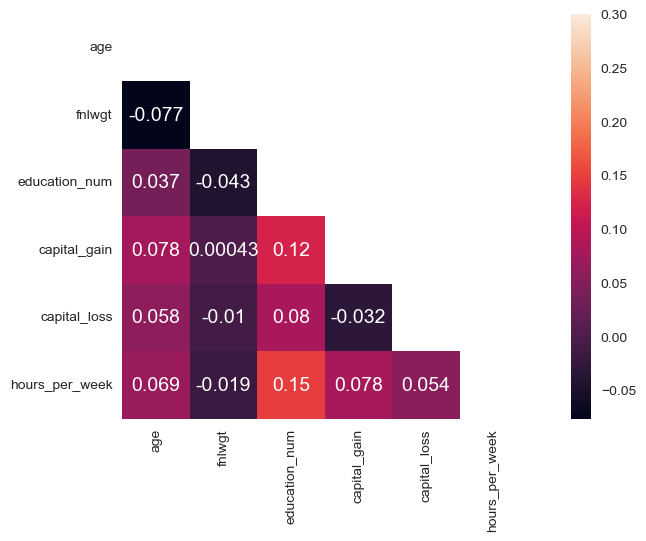

In [97]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True)
plt.show()

* In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

* From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [109]:
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0.039864,77516,0.164461,13,0.328092,0.115783,0.255060,0.854274,0.669205,2174,0,40,0.895857,0
1,50,0.078038,83311,0.164461,13,0.459937,0.124873,0.405178,0.854274,0.669205,0,0,13,0.895857,0
2,38,0.697030,215646,0.322502,9,0.136452,0.042075,0.255060,0.854274,0.669205,0,0,40,0.895857,0
3,53,0.697030,234721,0.036086,7,0.459937,0.042075,0.405178,0.095943,0.669205,0,0,40,0.895857,0
4,28,0.697030,338409,0.164461,13,0.459937,0.127146,0.048156,0.095943,0.330795,0,0,40,0.002918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.697030,257302,0.032769,12,0.459937,0.028500,0.048156,0.854274,0.330795,0,0,38,0.895857,0
32557,40,0.697030,154374,0.322502,9,0.459937,0.061485,0.405178,0.854274,0.669205,0,0,40,0.895857,1
32558,58,0.697030,151910,0.322502,9,0.030497,0.115783,0.105832,0.854274,0.330795,0,0,40,0.895857,0
32559,22,0.697030,201490,0.322502,9,0.328092,0.115783,0.155646,0.854274,0.669205,0,0,20,0.895857,0


In [ ]:
categorical_columns.remove('income')

In [110]:
 input_encoding = "FrequencyEncoder"

In [111]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))
    
elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)
    
elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency 
        fq = df.groupby(variable).size()/len(df)    
        # mapping values to dataframe 
        df.loc[:, "{}".format(variable)] = df[variable].map(fq) 
elif input_encoding == "CountEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency 
        fq = df[variable].value_counts().to_dict()
        # mapping values to dataframe 
        df.loc[:, "{}".format(variable)] = df[variable].map(fq) 

In [112]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0.039864,77516,0.164461,13,0.328092,0.115783,0.255060,0.854274,0.669205,2174,0,40,0.895857,0
1,50,0.078038,83311,0.164461,13,0.459937,0.124873,0.405178,0.854274,0.669205,0,0,13,0.895857,0
2,38,0.697030,215646,0.322502,9,0.136452,0.042075,0.255060,0.854274,0.669205,0,0,40,0.895857,0
3,53,0.697030,234721,0.036086,7,0.459937,0.042075,0.405178,0.095943,0.669205,0,0,40,0.895857,0
4,28,0.697030,338409,0.164461,13,0.459937,0.127146,0.048156,0.095943,0.330795,0,0,40,0.002918,0


### 4.3. Split X and y

Split the X and y dataset

In [113]:
# Split the y variable series and x variables dataset
X = df.drop(['income'],axis=1)
y = df['income']

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [114]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [115]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.030671,-1.571524,-1.063611,-0.225001,1.134739,-0.084091,0.532814,-0.099946,0.412541,0.703071,0.148453,-0.21666,-0.035429,0.340939
1,0.837109,-1.441957,-1.008707,-0.225001,1.134739,0.855523,0.792642,1.070589,0.412541,0.703071,-0.145920,-0.21666,-2.222153,0.340939
2,-0.042642,0.658938,0.245079,1.144805,-0.420060,-1.449848,-1.573906,-0.099946,0.412541,0.703071,-0.145920,-0.21666,-0.035429,0.340939
3,1.057047,0.658938,0.425801,-1.337670,-1.197459,0.855523,-1.573906,1.070589,-2.329130,0.703071,-0.145920,-0.21666,-0.035429,0.340939
4,-0.775768,0.658938,1.408176,-0.225001,1.134739,0.855523,0.857600,-1.713264,-2.329130,-1.422331,-0.145920,-0.21666,-0.035429,-2.953620


# 4.5 Feature Selection

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [122]:
selector.fit(scaled_X, y)

ExtraTreesClassifier(random_state=42)

In [123]:
feature_imp = selector.feature_importances_

In [124]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.92
1 3.52
2 16.85
3 4.0
4 7.84
5 8.25
6 8.74
7 8.92
8 1.31
9 2.41
10 8.47
11 2.66
12 9.68
13 1.43


In [126]:
X = scaled_X.drop(['workclass', 'education', 'race', 'sex',
            'capital_loss', 'native_country'], axis=1)

### 4.5 Train - Test Split

Split the dataset in training and test set

In [127]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [128]:
def training(X_train,X_test,y_train,y_test):
#LogisticRegression
    logmodel=LogisticRegression(random_state=1)
    logmodel.fit(X_train,y_train)
    pred=logmodel.predict(X_test)
    # Find Accuracy using accuracy_score method
    logmodel_accuracy = accuracy_score(y_test, pred)
    #confusionmatrix=confusion_matrix(y_test,pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    logmodel_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = logmodel.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    logmodel_auc = roc_auc_score(y_test,y_pred_prod)
    
#SGDClassifier
    from sklearn.linear_model import SGDClassifier
    sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
    sgd.fit(X_train,y_train)
    pred=sgd.predict(X_test)
    # Find Accuracy using accuracy_score method
    sgd_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    sgd_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = sgd.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    sgd_auc = roc_auc_score(y_test,y_pred_prod)

#DecisionTreeClassifier.
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier(criterion='gini',random_state=1)
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    # Find Accuracy using accuracy_score method
    dt_accuracy =accuracy_score(y_test, pred)
    #confusionmatrix=confusion_matrix(y_test,pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    dt_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = dt.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    dt_auc = roc_auc_score(y_test,y_pred_prod)
    
#RandomForestClassifier.
    rf=RandomForestClassifier(criterion = 'entropy',random_state=1)
    rf=rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    # Find Accuracy using accuracy_score method
    rf_accuracy = accuracy_score(y_test, pred)
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    rf_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = rf.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    rf_auc = roc_auc_score(y_test,y_pred_prod)
    
#KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier( n_neighbors=5,p=2) #p=2 means euclidean distance
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    # Find Accuracy using accuracy_score method
    knn_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    knn_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = knn.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    knn_auc = roc_auc_score(y_test,y_pred_prod)

#SVC
    from sklearn.svm import SVC
    SVC=SVC(random_state=1, kernel='rbf')
    SVC.fit(X_train,y_train)
    pred=SVC.predict(X_test)
    # Find Accuracy using accuracy_score method
    svc_accuracy = accuracy_score(y_test, pred)
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    svc_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    #y_pred_prod = SVC.predict_proba(X_test)
    #y_pred_prod = [x[1] for x in y_pred_prod]
    svc_auc = roc_auc_score(y_test,pred)

#naive_bayes
    from sklearn.naive_bayes import GaussianNB
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    pred=nb.predict(X_test)
    # Find Accuracy using accuracy_score method
    nb_accuracy =accuracy_score(y_test, pred)
        # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    nb_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = nb.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    nb_auc = roc_auc_score(y_test,y_pred_prod)

#XGBClassifier
    from xgboost import XGBClassifier
    xgb = XGBClassifier(criterion='gini',max_depth=5, n_estimators=50)
    xgb.fit(X_train, y_train)
    pred=xgb.predict(X_test)
    # Find Accuracy using accuracy_score method
    xgb_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    xgb_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = xgb.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    xgb_auc = roc_auc_score(y_test,y_pred_prod)
    
#CatBoostClassifier
    from catboost import CatBoostClassifier
    cb = CatBoostClassifier()
    cb.fit(X_train, y_train)
    pred=cb.predict(X_test)
    # Find Accuracy using accuracy_score method
    cb_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    cb_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = cb.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    cb_auc = roc_auc_score(y_test,y_pred_prod)
    
#LGBMClassifier
    from lightgbm import LGBMClassifier
    lgbm = LGBMClassifier()
    lgbm.fit(X_train, y_train)
    pred=lgbm.predict(X_test)
    # Find Accuracy using accuracy_score method
    lgbm_accuracy = accuracy_score(y_test, pred) 
    # Precison
    Precision = precision_score(y_test, pred)
    # Recall
    Recall = recall_score(y_test, pred)
    # F1 Score
    lgbm_F1_Score =f1_score(y_test, pred)
    # Area Under Curve
    y_pred_prod = lgbm.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    lgbm_auc = roc_auc_score(y_test,y_pred_prod)
    
    
    Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest','SGDClassifier','Naive Bayes','XGBClassifier','CatBoostClassifier','LGBMClassifier'],
    'Accuracy': [logmodel_accuracy, svc_accuracy, knn_accuracy,dt_accuracy, rf_accuracy, nb_accuracy, sgd_accuracy, xgb_accuracy,cb_accuracy,lgbm_accuracy],
    'roc_auc_score': [logmodel_auc, svc_auc, knn_auc, dt_auc, rf_auc, nb_auc, sgd_auc, xgb_auc,cb_auc,lgbm_auc],
    'F1_score':[logmodel_F1_Score, svc_F1_Score, knn_F1_Score, dt_F1_Score, rf_F1_Score, nb_F1_Score, sgd_F1_Score, xgb_F1_Score,cb_F1_Score,lgbm_F1_Score]})

    Model_Comparison_df = Model_Comparison.sort_values(by='roc_auc_score', ascending=False)
    Model_Comparison_df = Model_Comparison_df.set_index('Model')
    print(Model_Comparison_df.reset_index())    

In [129]:
training(X_train,X_test,y_train,y_test)

[16:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.039148
0:	learn: 0.6498231	total: 15.2ms	remaining: 15.2s
1:	learn: 0.6176436	total: 28.6ms	remaining: 14.3s
2:	learn: 0.5873604	total: 41.3ms	remaining: 13.7s
3:	learn: 0.5575858	total: 53.9ms	remaining: 13.4s
4:	learn: 0.5335819	total: 66.4ms	rema

151:	learn: 0.2982571	total: 1.97s	remaining: 11s
152:	learn: 0.2981351	total: 1.98s	remaining: 10.9s
153:	learn: 0.2980688	total: 1.99s	remaining: 10.9s
154:	learn: 0.2979746	total: 2s	remaining: 10.9s
155:	learn: 0.2978901	total: 2.02s	remaining: 10.9s
156:	learn: 0.2978150	total: 2.03s	remaining: 10.9s
157:	learn: 0.2977200	total: 2.04s	remaining: 10.9s
158:	learn: 0.2975961	total: 2.06s	remaining: 10.9s
159:	learn: 0.2975035	total: 2.07s	remaining: 10.8s
160:	learn: 0.2974265	total: 2.08s	remaining: 10.8s
161:	learn: 0.2973637	total: 2.09s	remaining: 10.8s
162:	learn: 0.2972741	total: 2.1s	remaining: 10.8s
163:	learn: 0.2971987	total: 2.11s	remaining: 10.8s
164:	learn: 0.2971383	total: 2.12s	remaining: 10.7s
165:	learn: 0.2970782	total: 2.13s	remaining: 10.7s
166:	learn: 0.2970380	total: 2.13s	remaining: 10.7s
167:	learn: 0.2968160	total: 2.14s	remaining: 10.6s
168:	learn: 0.2967277	total: 2.15s	remaining: 10.6s
169:	learn: 0.2966518	total: 2.15s	remaining: 10.5s
170:	learn: 0.2965

327:	learn: 0.2838293	total: 3.05s	remaining: 6.26s
328:	learn: 0.2837460	total: 3.06s	remaining: 6.24s
329:	learn: 0.2836928	total: 3.06s	remaining: 6.22s
330:	learn: 0.2836434	total: 3.07s	remaining: 6.21s
331:	learn: 0.2834988	total: 3.08s	remaining: 6.19s
332:	learn: 0.2833996	total: 3.08s	remaining: 6.17s
333:	learn: 0.2832757	total: 3.09s	remaining: 6.16s
334:	learn: 0.2831889	total: 3.09s	remaining: 6.14s
335:	learn: 0.2831076	total: 3.1s	remaining: 6.13s
336:	learn: 0.2830306	total: 3.1s	remaining: 6.11s
337:	learn: 0.2829755	total: 3.11s	remaining: 6.09s
338:	learn: 0.2828917	total: 3.12s	remaining: 6.08s
339:	learn: 0.2827995	total: 3.12s	remaining: 6.06s
340:	learn: 0.2827305	total: 3.13s	remaining: 6.04s
341:	learn: 0.2826434	total: 3.13s	remaining: 6.03s
342:	learn: 0.2825785	total: 3.14s	remaining: 6.01s
343:	learn: 0.2825030	total: 3.14s	remaining: 6s
344:	learn: 0.2824453	total: 3.15s	remaining: 5.98s
345:	learn: 0.2823962	total: 3.15s	remaining: 5.96s
346:	learn: 0.282

493:	learn: 0.2732924	total: 3.97s	remaining: 4.07s
494:	learn: 0.2732397	total: 3.98s	remaining: 4.05s
495:	learn: 0.2731601	total: 3.98s	remaining: 4.04s
496:	learn: 0.2731132	total: 3.99s	remaining: 4.03s
497:	learn: 0.2730595	total: 3.99s	remaining: 4.02s
498:	learn: 0.2730068	total: 4s	remaining: 4.01s
499:	learn: 0.2729124	total: 4s	remaining: 4s
500:	learn: 0.2728629	total: 4.01s	remaining: 3.99s
501:	learn: 0.2728146	total: 4.01s	remaining: 3.98s
502:	learn: 0.2727465	total: 4.02s	remaining: 3.97s
503:	learn: 0.2726905	total: 4.02s	remaining: 3.96s
504:	learn: 0.2726527	total: 4.03s	remaining: 3.95s
505:	learn: 0.2725934	total: 4.04s	remaining: 3.94s
506:	learn: 0.2725596	total: 4.04s	remaining: 3.93s
507:	learn: 0.2724921	total: 4.04s	remaining: 3.92s
508:	learn: 0.2724595	total: 4.05s	remaining: 3.91s
509:	learn: 0.2723592	total: 4.06s	remaining: 3.9s
510:	learn: 0.2723140	total: 4.06s	remaining: 3.89s
511:	learn: 0.2722819	total: 4.07s	remaining: 3.88s
512:	learn: 0.2722087	

652:	learn: 0.2651308	total: 5.51s	remaining: 2.93s
653:	learn: 0.2650682	total: 5.52s	remaining: 2.92s
654:	learn: 0.2650372	total: 5.53s	remaining: 2.91s
655:	learn: 0.2649850	total: 5.54s	remaining: 2.91s
656:	learn: 0.2649099	total: 5.56s	remaining: 2.9s
657:	learn: 0.2648493	total: 5.57s	remaining: 2.9s
658:	learn: 0.2648050	total: 5.58s	remaining: 2.89s
659:	learn: 0.2647389	total: 5.59s	remaining: 2.88s
660:	learn: 0.2646860	total: 5.61s	remaining: 2.88s
661:	learn: 0.2646350	total: 5.62s	remaining: 2.87s
662:	learn: 0.2645824	total: 5.63s	remaining: 2.86s
663:	learn: 0.2645463	total: 5.64s	remaining: 2.85s
664:	learn: 0.2645030	total: 5.65s	remaining: 2.85s
665:	learn: 0.2644561	total: 5.67s	remaining: 2.84s
666:	learn: 0.2643737	total: 5.68s	remaining: 2.83s
667:	learn: 0.2643497	total: 5.69s	remaining: 2.83s
668:	learn: 0.2642962	total: 5.7s	remaining: 2.82s
669:	learn: 0.2642607	total: 5.72s	remaining: 2.81s
670:	learn: 0.2642200	total: 5.73s	remaining: 2.81s
671:	learn: 0.2

811:	learn: 0.2579156	total: 7.45s	remaining: 1.72s
812:	learn: 0.2578485	total: 7.46s	remaining: 1.72s
813:	learn: 0.2578165	total: 7.47s	remaining: 1.71s
814:	learn: 0.2577483	total: 7.49s	remaining: 1.7s
815:	learn: 0.2576614	total: 7.5s	remaining: 1.69s
816:	learn: 0.2575965	total: 7.51s	remaining: 1.68s
817:	learn: 0.2575792	total: 7.53s	remaining: 1.67s
818:	learn: 0.2575446	total: 7.54s	remaining: 1.67s
819:	learn: 0.2575178	total: 7.55s	remaining: 1.66s
820:	learn: 0.2574718	total: 7.56s	remaining: 1.65s
821:	learn: 0.2574407	total: 7.57s	remaining: 1.64s
822:	learn: 0.2574109	total: 7.59s	remaining: 1.63s
823:	learn: 0.2573727	total: 7.6s	remaining: 1.62s
824:	learn: 0.2573147	total: 7.61s	remaining: 1.61s
825:	learn: 0.2572596	total: 7.62s	remaining: 1.61s
826:	learn: 0.2572177	total: 7.64s	remaining: 1.6s
827:	learn: 0.2571920	total: 7.65s	remaining: 1.59s
828:	learn: 0.2571613	total: 7.66s	remaining: 1.58s
829:	learn: 0.2571165	total: 7.67s	remaining: 1.57s
830:	learn: 0.25

980:	learn: 0.2509190	total: 9.62s	remaining: 186ms
981:	learn: 0.2508848	total: 9.64s	remaining: 177ms
982:	learn: 0.2508571	total: 9.65s	remaining: 167ms
983:	learn: 0.2508262	total: 9.66s	remaining: 157ms
984:	learn: 0.2507851	total: 9.67s	remaining: 147ms
985:	learn: 0.2507506	total: 9.69s	remaining: 138ms
986:	learn: 0.2507152	total: 9.7s	remaining: 128ms
987:	learn: 0.2506473	total: 9.71s	remaining: 118ms
988:	learn: 0.2506210	total: 9.73s	remaining: 108ms
989:	learn: 0.2505639	total: 9.74s	remaining: 98.4ms
990:	learn: 0.2504981	total: 9.75s	remaining: 88.6ms
991:	learn: 0.2504569	total: 9.77s	remaining: 78.8ms
992:	learn: 0.2504196	total: 9.78s	remaining: 68.9ms
993:	learn: 0.2503675	total: 9.79s	remaining: 59.1ms
994:	learn: 0.2503288	total: 9.8s	remaining: 49.3ms
995:	learn: 0.2502708	total: 9.82s	remaining: 39.4ms
996:	learn: 0.2502374	total: 9.83s	remaining: 29.6ms
997:	learn: 0.2502109	total: 9.85s	remaining: 19.7ms
998:	learn: 0.2501681	total: 9.86s	remaining: 9.87ms
999:

In [133]:
input_ml_algo = 'XGBClassifier'

In [134]:
# Select the algorithm according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif input_ml_algo == 'RandomForestClassifier':
    model = RandomForestClassifier()
elif input_ml_algo == 'XGBClassifier':
    model = XGBClassifier()
elif input_ml_algo == 'LGBMClassifier':
    model = LGBMClassifier()
elif input_ml_algo == 'CatBoostClassifier':
    model = CatBoostClassifier()

In [135]:
# Training the model:
model.fit(X_train, y_train)

model

[16:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [138]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [0 0 0 ... 1 0 0]
Y probability predicted :  [0.014419405, 0.038906533, 0.23452939, 0.07878606, 0.080711655]


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [139]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 


 Accuracy Score : 
  0.8573037158358071

 AUC Score : 
 0.9154224492084576

 Confusion Matrix : 
  [[6859  548]
 [ 846 1516]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7407
           1       0.73      0.64      0.69      2362

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769


 ROC curve : 



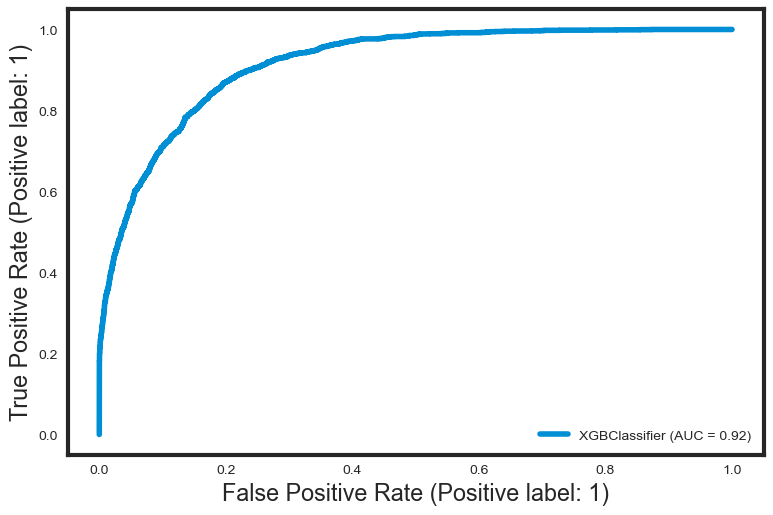

In [140]:
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model. 

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results. 

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [156]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)

In [157]:
# Over sample the minority class 
round(y_ros.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [158]:
# Define the function to build model on balanced dataset
def classification_model(X, y):
    
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model

[16:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy Score : 
  0.8605717367853291

 AUC Score : 
 0.9363064316928127

 Confusion Matrix : 
  [[6140 1332]
 [ 736 6624]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.82      0.86      7472
           1       0.83      0.90      0.86      7360

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832


 ROC curve : 



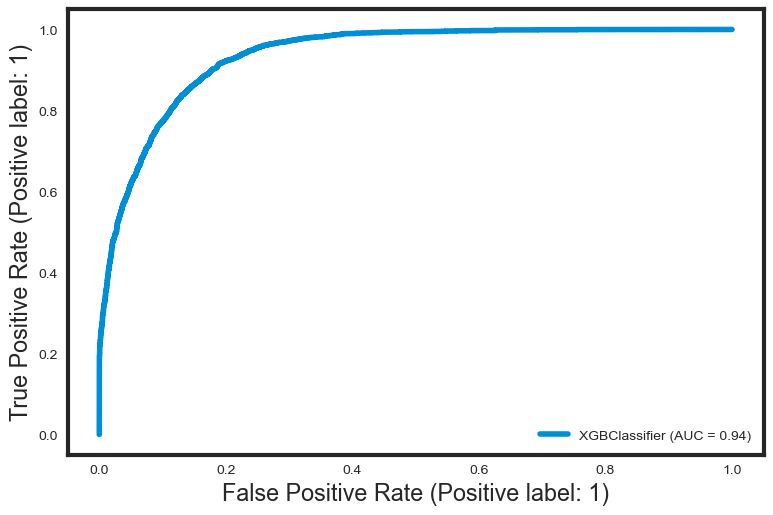

In [159]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)

In [160]:
scaled_X = scale_data(X_ros)
    
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_ros, test_size = 0.3, random_state = 0)

In [161]:
training(X_train,X_test,y_train,y_test)

[16:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.046791
0:	learn: 0.6571682	total: 14.9ms	remaining: 14.9s
1:	learn: 0.6254728	total: 28ms	remaining: 14s
2:	learn: 0.6032189	total: 41.8ms	remaining: 13.9s
3:	learn: 0.5782937	total: 55.2ms	remaining: 13.7s
4:	learn: 0.5565810	total: 68.4ms	remainin

153:	learn: 0.3557034	total: 2.2s	remaining: 12.1s
154:	learn: 0.3556456	total: 2.22s	remaining: 12.1s
155:	learn: 0.3554976	total: 2.23s	remaining: 12.1s
156:	learn: 0.3554058	total: 2.25s	remaining: 12.1s
157:	learn: 0.3553117	total: 2.26s	remaining: 12s
158:	learn: 0.3551734	total: 2.27s	remaining: 12s
159:	learn: 0.3550505	total: 2.29s	remaining: 12s
160:	learn: 0.3549531	total: 2.3s	remaining: 12s
161:	learn: 0.3543349	total: 2.32s	remaining: 12s
162:	learn: 0.3541481	total: 2.33s	remaining: 12s
163:	learn: 0.3537236	total: 2.35s	remaining: 12s
164:	learn: 0.3535495	total: 2.37s	remaining: 12s
165:	learn: 0.3534751	total: 2.38s	remaining: 12s
166:	learn: 0.3531890	total: 2.4s	remaining: 12s
167:	learn: 0.3530909	total: 2.41s	remaining: 11.9s
168:	learn: 0.3529616	total: 2.42s	remaining: 11.9s
169:	learn: 0.3527119	total: 2.44s	remaining: 11.9s
170:	learn: 0.3525702	total: 2.45s	remaining: 11.9s
171:	learn: 0.3524325	total: 2.47s	remaining: 11.9s
172:	learn: 0.3522858	total: 2.48s	

313:	learn: 0.3346132	total: 4.43s	remaining: 9.68s
314:	learn: 0.3344671	total: 4.45s	remaining: 9.67s
315:	learn: 0.3343451	total: 4.46s	remaining: 9.66s
316:	learn: 0.3342430	total: 4.47s	remaining: 9.64s
317:	learn: 0.3340988	total: 4.49s	remaining: 9.63s
318:	learn: 0.3340105	total: 4.5s	remaining: 9.61s
319:	learn: 0.3339350	total: 4.52s	remaining: 9.6s
320:	learn: 0.3338208	total: 4.53s	remaining: 9.58s
321:	learn: 0.3337158	total: 4.54s	remaining: 9.57s
322:	learn: 0.3335696	total: 4.56s	remaining: 9.55s
323:	learn: 0.3334920	total: 4.57s	remaining: 9.54s
324:	learn: 0.3334161	total: 4.58s	remaining: 9.52s
325:	learn: 0.3330944	total: 4.6s	remaining: 9.5s
326:	learn: 0.3329465	total: 4.61s	remaining: 9.49s
327:	learn: 0.3328695	total: 4.62s	remaining: 9.47s
328:	learn: 0.3327886	total: 4.64s	remaining: 9.46s
329:	learn: 0.3326976	total: 4.65s	remaining: 9.45s
330:	learn: 0.3325870	total: 4.67s	remaining: 9.43s
331:	learn: 0.3324715	total: 4.68s	remaining: 9.42s
332:	learn: 0.33

480:	learn: 0.3192167	total: 6.9s	remaining: 7.45s
481:	learn: 0.3191764	total: 6.92s	remaining: 7.43s
482:	learn: 0.3190782	total: 6.93s	remaining: 7.42s
483:	learn: 0.3190175	total: 6.95s	remaining: 7.41s
484:	learn: 0.3189397	total: 6.97s	remaining: 7.4s
485:	learn: 0.3188551	total: 6.99s	remaining: 7.39s
486:	learn: 0.3187556	total: 7s	remaining: 7.38s
487:	learn: 0.3186684	total: 7.02s	remaining: 7.37s
488:	learn: 0.3185618	total: 7.04s	remaining: 7.36s
489:	learn: 0.3184801	total: 7.06s	remaining: 7.34s
490:	learn: 0.3183905	total: 7.07s	remaining: 7.33s
491:	learn: 0.3183333	total: 7.09s	remaining: 7.32s
492:	learn: 0.3181888	total: 7.11s	remaining: 7.31s
493:	learn: 0.3180777	total: 7.12s	remaining: 7.3s
494:	learn: 0.3179588	total: 7.14s	remaining: 7.29s
495:	learn: 0.3178664	total: 7.18s	remaining: 7.3s
496:	learn: 0.3177560	total: 7.2s	remaining: 7.29s
497:	learn: 0.3176952	total: 7.22s	remaining: 7.28s
498:	learn: 0.3176023	total: 7.24s	remaining: 7.27s
499:	learn: 0.317527

639:	learn: 0.3068172	total: 9.29s	remaining: 5.23s
640:	learn: 0.3067407	total: 9.31s	remaining: 5.21s
641:	learn: 0.3066637	total: 9.32s	remaining: 5.2s
642:	learn: 0.3066155	total: 9.34s	remaining: 5.18s
643:	learn: 0.3065703	total: 9.35s	remaining: 5.17s
644:	learn: 0.3065097	total: 9.36s	remaining: 5.15s
645:	learn: 0.3064459	total: 9.38s	remaining: 5.14s
646:	learn: 0.3063692	total: 9.39s	remaining: 5.12s
647:	learn: 0.3063030	total: 9.4s	remaining: 5.11s
648:	learn: 0.3062533	total: 9.41s	remaining: 5.09s
649:	learn: 0.3061932	total: 9.43s	remaining: 5.08s
650:	learn: 0.3061439	total: 9.44s	remaining: 5.06s
651:	learn: 0.3061026	total: 9.46s	remaining: 5.05s
652:	learn: 0.3060460	total: 9.47s	remaining: 5.03s
653:	learn: 0.3059359	total: 9.48s	remaining: 5.02s
654:	learn: 0.3058536	total: 9.5s	remaining: 5s
655:	learn: 0.3057881	total: 9.51s	remaining: 4.99s
656:	learn: 0.3057005	total: 9.53s	remaining: 4.97s
657:	learn: 0.3056264	total: 9.54s	remaining: 4.96s
658:	learn: 0.3055

798:	learn: 0.2964416	total: 11.5s	remaining: 2.89s
799:	learn: 0.2963898	total: 11.5s	remaining: 2.88s
800:	learn: 0.2963057	total: 11.5s	remaining: 2.86s
801:	learn: 0.2962606	total: 11.5s	remaining: 2.85s
802:	learn: 0.2961620	total: 11.6s	remaining: 2.83s
803:	learn: 0.2960721	total: 11.6s	remaining: 2.82s
804:	learn: 0.2960051	total: 11.6s	remaining: 2.81s
805:	learn: 0.2959725	total: 11.6s	remaining: 2.79s
806:	learn: 0.2959001	total: 11.6s	remaining: 2.77s
807:	learn: 0.2958705	total: 11.6s	remaining: 2.76s
808:	learn: 0.2958057	total: 11.6s	remaining: 2.75s
809:	learn: 0.2957600	total: 11.6s	remaining: 2.73s
810:	learn: 0.2956892	total: 11.7s	remaining: 2.72s
811:	learn: 0.2956112	total: 11.7s	remaining: 2.7s
812:	learn: 0.2955452	total: 11.7s	remaining: 2.69s
813:	learn: 0.2954816	total: 11.7s	remaining: 2.67s
814:	learn: 0.2954066	total: 11.7s	remaining: 2.66s
815:	learn: 0.2953007	total: 11.7s	remaining: 2.65s
816:	learn: 0.2952056	total: 11.7s	remaining: 2.63s
817:	learn: 0

961:	learn: 0.2870042	total: 13.7s	remaining: 543ms
962:	learn: 0.2869257	total: 13.8s	remaining: 529ms
963:	learn: 0.2868482	total: 13.8s	remaining: 514ms
964:	learn: 0.2867739	total: 13.8s	remaining: 500ms
965:	learn: 0.2867017	total: 13.8s	remaining: 486ms
966:	learn: 0.2866359	total: 13.8s	remaining: 471ms
967:	learn: 0.2865830	total: 13.8s	remaining: 457ms
968:	learn: 0.2865445	total: 13.8s	remaining: 443ms
969:	learn: 0.2864879	total: 13.9s	remaining: 428ms
970:	learn: 0.2864301	total: 13.9s	remaining: 414ms
971:	learn: 0.2863475	total: 13.9s	remaining: 400ms
972:	learn: 0.2862806	total: 13.9s	remaining: 386ms
973:	learn: 0.2862427	total: 13.9s	remaining: 371ms
974:	learn: 0.2862266	total: 13.9s	remaining: 357ms
975:	learn: 0.2861596	total: 13.9s	remaining: 343ms
976:	learn: 0.2861039	total: 13.9s	remaining: 328ms
977:	learn: 0.2860182	total: 14s	remaining: 314ms
978:	learn: 0.2859410	total: 14s	remaining: 300ms
979:	learn: 0.2858766	total: 14s	remaining: 286ms
980:	learn: 0.2858

### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [162]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [163]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],  
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           } 

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

# Define the parameters gird for XGBoost
param_grid_xgb = {'n_estimator':[100,200],
                  'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

# Define the parameters gird for catboost
param_grid_ct = { "learning_rate": np.linspace(0,0.2,5),
                  'iterations': [100, 150, 200],
                  'depth': [2, 4, 6, 8],
                  'l2_leaf_reg': [0.2, 0.5, 1, 3]} 

In [164]:
input_ml_algo = 'RandomForestClassifier'

In [165]:
# Select the model and parameter grid according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model       = DecisionTreeClassifier()
    param_grid  = param_grid_decision_tree
elif input_ml_algo == 'RandomForestClassifier':
    model       = RandomForestClassifier()
    param_grid  = param_grid_random_forest
elif input_ml_algo == 'XGBClassifier':
    model       = XGBClassifier()
    param_grid  = param_grid_xgb
elif input_ml_algo == 'LGBMClassifier':
    model       = LGBMClassifier()
    param_grid  = param_grid_lgbm
elif input_ml_algo == 'CatBoostClassifier':
    model       = CatBoostClassifier()
    param_grid  = param_grid_ct

In [166]:
 # Run grid search 
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [167]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [0 0 1 ... 0 1 0]
Y probability predicted :  [0.33, 0.06, 0.945, 0.69, 0.975]



 Accuracy Score : 
  0.9165992448759439

 AUC Score : 
 0.9787753082522578

 Confusion Matrix : 
  [[6488  984]
 [ 253 7107]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      7472
           1       0.88      0.97      0.92      7360

    accuracy                           0.92     14832
   macro avg       0.92      0.92      0.92     14832
weighted avg       0.92      0.92      0.92     14832


 ROC curve : 



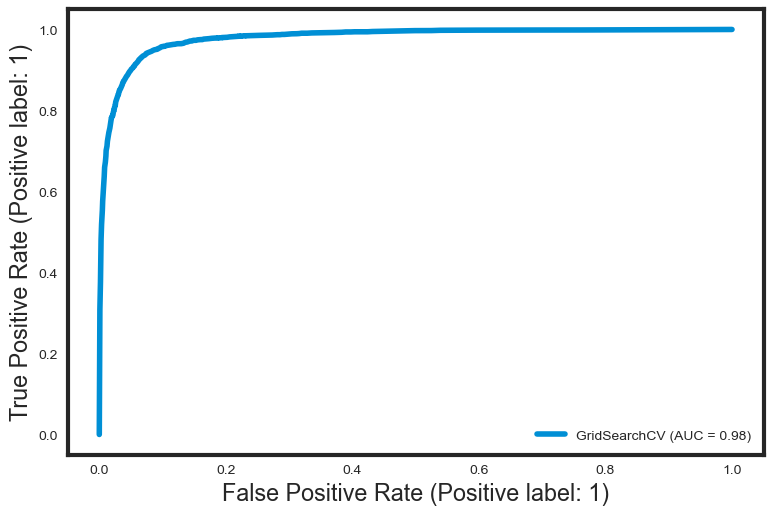

In [168]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)

# summary

* we tested various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier,etc from all models we find best is random Forest.

* fro models comparision we uses different metric from all other models random forest gives best results.

* A hyperparameter tuned random forest classifier gives the highest accuracy score of 91.65 and f1 score of 92 and roc_auc_score 98%.